🔥 [Day 3] Build Neural Network from Scratch
🎯 Goals Today:

1. Build a neural network using torch.nn
2. Use activation functions (ReLU, Sigmoid)
3. Train the network with dummy data

📚 1. Basic Neural Network Structure

In [2]:
import torch
import torch.nn as nn

# Define a basic feedforward neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer: 1 feature -> 10 Hidden
        self.relu = nn.ReLU()        # Activation
        self.fc2 = nn.Linear(10, 1)  # Output layer: 10 Hidden -> 1 output

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


🔁 2. Training Model: learning y = 2x + 1

In [7]:
import torch.optim as optim

# Generate Training Data
x_train = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)  # Shape: (100,1)
y_train = 2 * x_train + 1 + 0.2 * torch.randn(x_train.size()) # add noise

# Model, loss, optimizer
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Lost = {loss.item():.4f}")

Epoch 0: Lost = 29.0943
Epoch 10: Lost = 3.3613
Epoch 20: Lost = 0.1260
Epoch 30: Lost = 0.0924
Epoch 40: Lost = 0.0828
Epoch 50: Lost = 0.0754
Epoch 60: Lost = 0.0695
Epoch 70: Lost = 0.0651
Epoch 80: Lost = 0.0616
Epoch 90: Lost = 0.0589


📊 3. Evaluation and Visualization (Optional)

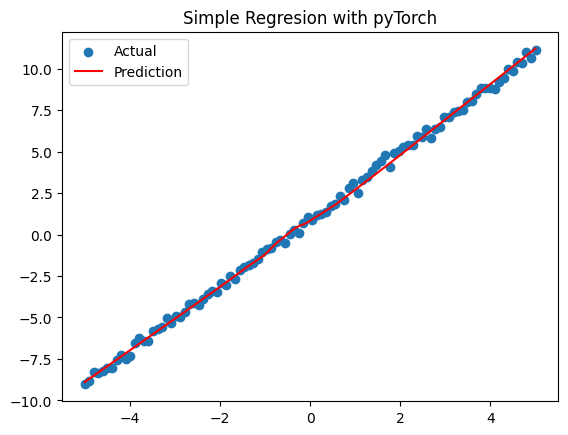

In [9]:
import matplotlib.pyplot as plt

# Evaluation Model
model.eval()
predicted = model(x_train).detach()

plt.scatter(x_train.numpy(), y_train.numpy(), label='Actual')
plt.plot(x_train.numpy(), predicted.numpy(), color = 'red', label = 'Prediction')
plt.legend()
plt.title("Simple Regresion with pyTorch")
plt.show()


📝 Exercise Day 3

1. Change the model to 3 layers (fc1, fc2, fc3) with hidden layer 10 → 5 → 1.
2. try replacing ReLU with Sigmoid.
3. try new target function : y=x^2


✅ 1. Modified Model: 3 Layers + Sigmoid

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Define the model
class DeeperNet(nn.Module):
    def __init__(self):
        super(DeeperNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(10, 5)
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return(x)
    
model = DeeperNet()
print(model)

DeeperNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


✅ 2. Generate Training Data: y=x^2

In [12]:
# Generate data for y = x^2
x_train = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y_train = x_train ** 2 + 0.2 * torch.randn(x_train.size()) # add a bit of noise

✅ 3. Training Loop

In [16]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(300):
    model.train()
    output = model(x_train)
    loss = criterion(output, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 80.3263
Epoch 50, Loss: 39.3535
Epoch 100, Loss: 13.0139
Epoch 150, Loss: 12.4338
Epoch 200, Loss: 10.3583
Epoch 250, Loss: 8.6992


✅ 4. Visualize Results

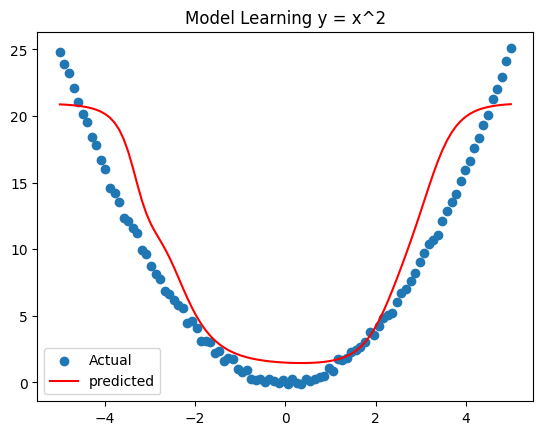

In [17]:
model.eval()
predicted = model(x_train).detach()

plt.scatter(x_train.numpy(), y_train.numpy(), label="Actual")
plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='predicted')
plt.legend()
plt.title("Model Learning y = x^2")
plt.show()